<a href="https://colab.research.google.com/github/iamsriram958/AIML/blob/main/Assignment_1_Predict_Startup_Profit_using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pickle

In [ ]:
# Load the dataset
data = pd.read_csv('/content/50_Startups.csv')

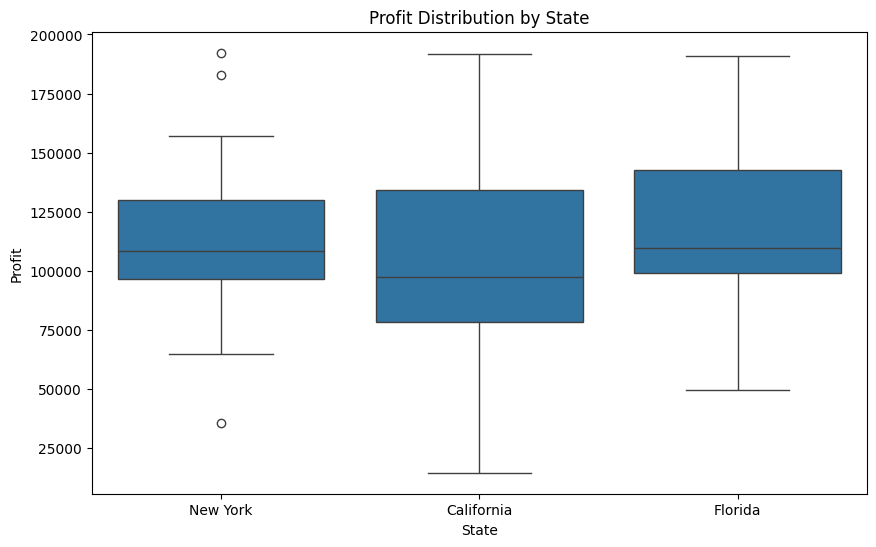

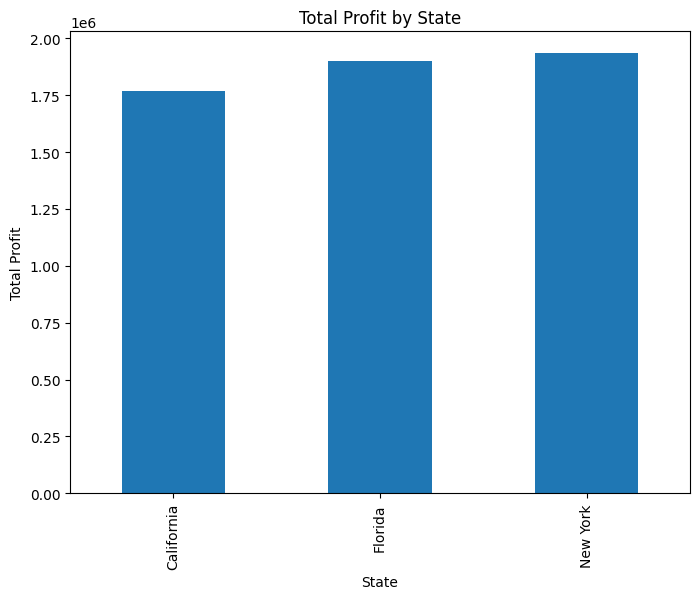

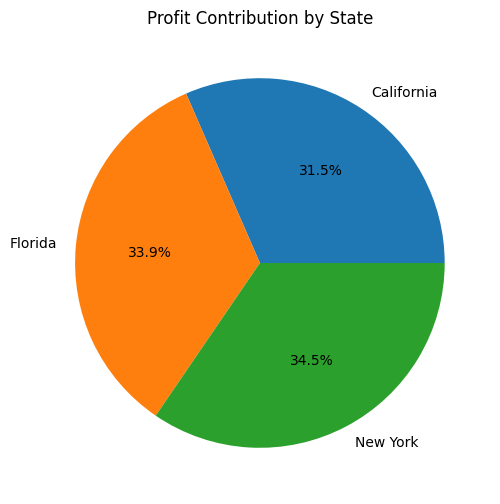

In [ ]:
# prompt: can you categorize visulaize the states and profit contribution

import seaborn as sns

# Assuming 'State' and 'Profit' are columns in your DataFrame 'data'

# Visualize profit distribution by state
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Profit', data=data)
plt.title('Profit Distribution by State')
plt.xlabel('State')
plt.ylabel('Profit')
plt.show()

# Calculate and visualize the profit contribution of each state
state_profit = data.groupby('State')['Profit'].sum()
plt.figure(figsize=(8, 6))
state_profit.plot(kind='bar')
plt.title('Total Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.show()

# Calculate the percentage contribution of each state to the total profit
total_profit = data['Profit'].sum()
state_profit_percentage = (state_profit / total_profit) * 100

plt.figure(figsize=(8, 6))
state_profit_percentage.plot(kind='pie', autopct='%1.1f%%')
plt.title('Profit Contribution by State')
plt.ylabel('')  # Remove the default y-label
plt.show()

In [ ]:
# Prepare the data
X = data['Marketing Spend'].values.reshape(-1, 1)  # Independent variable (Marketing Spend)
y = data['Profit'].values  # Dependent variable (Profit)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model (R-squared)
r2 = model.score(X_test, y_test)
print(f"R-squared: {r2}")

print("Intercept value")
print(model.intercept_)

model.predict(X[0:5])

# Compare actual vs predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)


R-squared: -0.11205578997827947
Intercept value
48923.31296724075
      Actual      Predicted
0  134307.35  120440.331743
1   81005.76   98457.010516
2   99937.59   74718.086315
3   64926.08   49462.221939
4  125370.37  128906.206651
5   35673.41   48923.312967
6  105733.54   86866.296875
7  107404.34   87973.747410
8   97427.84   61967.781345
9  122776.86   48923.312967


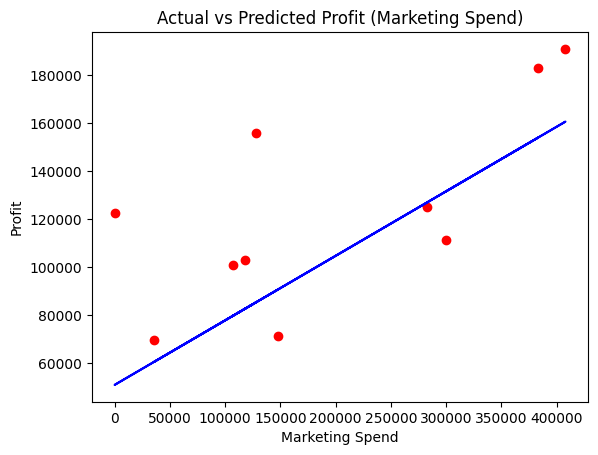

In [ ]:
# Plot actual vs predicted values
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Actual vs Predicted Profit (Marketing Spend)')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

In [ ]:
filename = 'Assignment 1 simple linear regression.pkl'
pickle.dump(model, open(filename, 'wb'))
with open('Assignment 1 simple linear regression.pkl', 'rb') as f:
    clf2 = pickle.load(f)

**MULTI LINEAR REGRESSION MODEL**

Profit ~ R&D Spend + Administration + Marketing Spend + State


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [ ]:
# Load the dataset
data = pd.read_csv('/content/50_Startups.csv')

In [ ]:
# Handle categorical variable 'State' using OneHotEncoding
state_encoder = LabelEncoder()
data['State'] = state_encoder.fit_transform(data['State'])
state_ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # handle_unknown added
state_encoded = state_ohe.fit_transform(data[['State']])
state_df = pd.DataFrame(state_encoded, columns=['State_'+str(int(i)) for i in range(state_encoded.shape[1])])
data = pd.concat([data, state_df], axis=1)
data.drop('State', axis=1, inplace=True)

# Prepare the data
X = data.drop('Profit', axis=1)
y = data['Profit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


# Train the model using statsmodels for detailed statistics
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     144.2
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           7.04e-22
Time:                        02:58:53   Log-Likelihood:                -420.06
No. Observations:                  40   AIC:                             852.1
Df Residuals:                      34   BIC:                             862.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.855e+04   6105.904     

In [ ]:
# Make predictions using statsmodels
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

mse_multiple = mean_squared_error(y_test, y_pred)
r2_multiple = r2_score(y_test, y_pred)
print(f"  R² Score: {r2_multiple:.4f}")
print(f"Mean Squared Error: {mse_multiple:.4f}")
# Evaluate the model (R-squared)
r2 = model.rsquared
print(f"R-squared: {r2}")

# Compare actual vs predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

  R² Score: 0.8971
Mean Squared Error: 106505548.8612
R-squared: 0.9549817154450555
       Actual      Predicted
34   96712.80   84457.161150
36   90708.19   72543.445444
1   191792.06  186070.979346
38   81229.06   67431.796510
8   152211.77  150237.477192
16  126992.93  113635.434398
35   96479.51   88703.002243
13  134307.35  124781.176204
29  101004.64  101217.779518
24  108552.04  113863.688254


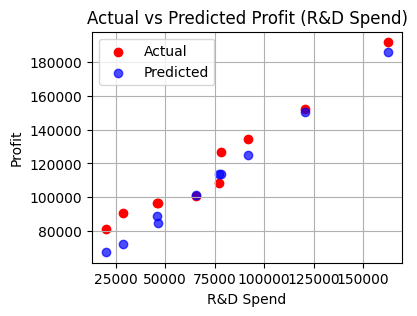

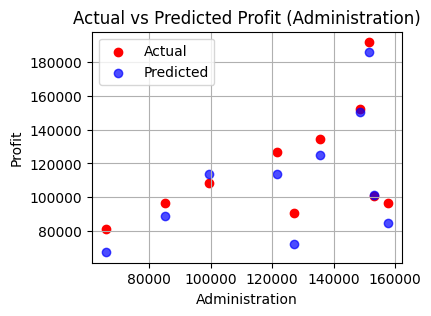

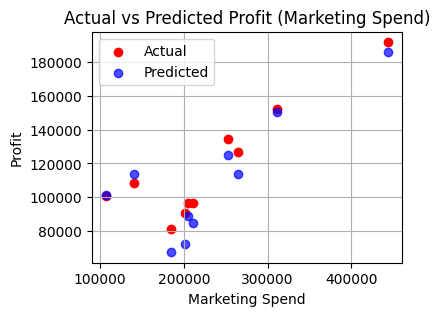

In [ ]:
# Visualizing Actual vs Predicted Profit for all independent variables
def plot_actual_vs_predicted(X_test, y_test, y_pred, variable):
    # Indent the code block within the function
    plt.figure(figsize=(4,3))
    plt.scatter(X_test[variable], y_test, color='red', label='Actual')
    plt.scatter(X_test[variable], y_pred, color='blue', label='Predicted', alpha=0.7)
    plt.title(f'Actual vs Predicted Profit ({variable})')
    plt.xlabel(variable)
    plt.ylabel('Profit')
    plt.legend()
    plt.grid()
    plt.show()

# Loop through each numerical independent variable
for variable in ['R&D Spend', 'Administration', 'Marketing Spend']:
    plot_actual_vs_predicted(X_test, y_test, y_pred, variable)

In [ ]:

# Save the model (using pickle)
filename = 'Assignmnet 1 multi linear regression model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Load and test the saved model (optional)
with open('Assignmnet 1 multi linear regression model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    y_pred_loaded = loaded_model.predict(X_test_sm)



In [ ]:
# prompt: /content/Assignment_1_Predict_Startup_Profit_using_Regression.ipynb
# convert this to jupyter NB to html file

!jupyter nbconvert --to html /content/Assignment_1_Predict_Startup_Profit_using_Regression.ipynb

[NbConvertApp] Converting notebook /content/Assignment_1_Predict_Startup_Profit_using_Regression.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 448553 bytes to /content/Assignment_1_Predict_Startup_Profit_using_Regression.html
